In [1]:
from __future__ import division
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 10000 # Number of positive-effect alleles
p = 100 / N # Prevalence of each allele

def generate_individual(N, p):
    return np.random.random(size=N) <= p

def individual_score(indiv):
    return np.sum(indiv)

In [3]:
def mate_pair(indiv, other):
    assert len(indiv) == len(other)
    mask = np.random.randint(2, size=len(indiv)).astype(bool)
    new = np.empty(len(indiv), dtype=bool)
    new[mask] = indiv[mask]
    new[~mask] = other[~mask]
    return new

def random_mating(population, size):
    new_population = []
    popsize = len(population)
    for i in range(size):
        idxs = np.random.randint(popsize, size=2)
        new_indiv = mate_pair(population[idxs[0]], population[idxs[1]])
        new_population.append(new_indiv)
    return new_population

def truncate_population(population, frac=0.5):
    scores = [individual_score(indiv) for indiv in population]
    percentile = np.percentile(scores, frac * 100)
    return [p for p in population if individual_score(p) >= percentile]

In [4]:
def show_population(population, title=None):
    scores = np.array([individual_score(indiv) for indiv in population])
    plt.figure(figsize=(10, 4))
    if title is not None:
        plt.title(title)
        print(title)
    plt.xlabel('Individual # of Positive Alleles')
    plt.ylabel('# of Individuals in Population')
    plt.hist(scores, bins=max(scores) - min(scores))
    mean, stdev = np.mean(scores), np.std(scores)
    xvals = np.linspace(mean - 3 * stdev, mean + 3 * stdev, 10000)
    plt.xlim((40, 160))
    plt.plot(xvals, len(population) * stats.norm.pdf(xvals, loc=mean, scale=stdev), 'k', lw=4)
    print('Mean: {:.1f}'.format(mean))
    print('Standard Deviation: {:.2f}'.format(stdev))
    print('Percent above 130: {:.3f}%'.format(100 * np.sum(scores > 130) / len(scores)))

Initial Equilibrium Population
Mean: 100.0
Standard Deviation: 10.13
Percent above 130: 0.180%


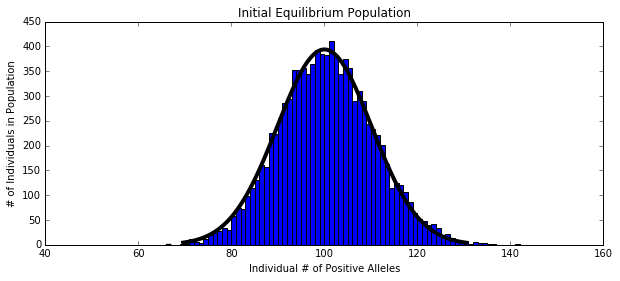

In [5]:
population = [generate_individual(N, p) for i in range(10000)]
show_population(population, title='Initial Equilibrium Population')

Initial Population, after truncation selection
Mean: 107.9
Standard Deviation: 6.42
Percent above 130: 0.351%


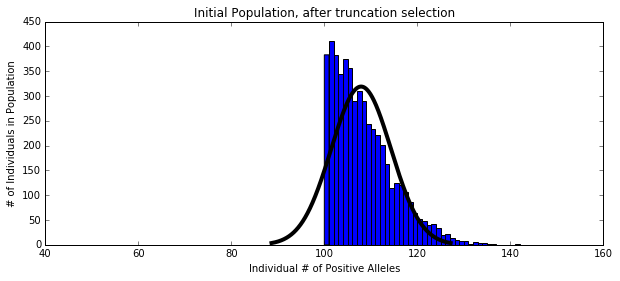

In [6]:
truncated = truncate_population(population, 0.5)
show_population(truncated, title='Initial Population, after truncation selection')

After truncation selection, Generation 1
Mean: 107.8
Standard Deviation: 8.67
Percent above 130: 0.700%
After truncation selection, Generation 2
Mean: 107.8
Standard Deviation: 9.60
Percent above 130: 1.040%
After truncation selection, Generation 3
Mean: 107.8
Standard Deviation: 10.06
Percent above 130: 1.360%
After truncation selection, Generation 4
Mean: 107.7
Standard Deviation: 10.30
Percent above 130: 1.400%


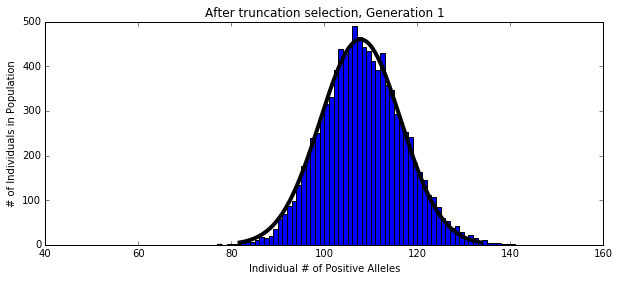

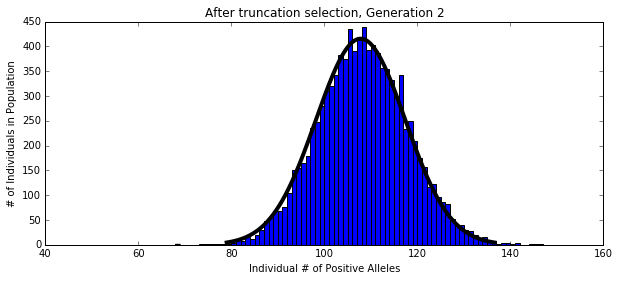

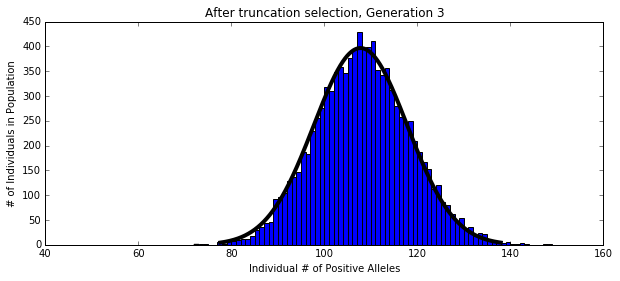

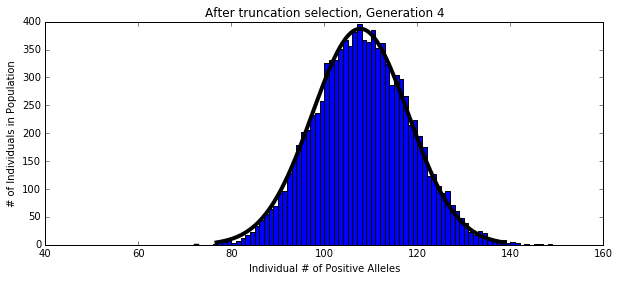

In [7]:
next_generation = truncated
for generation in range(1, 5):
    next_generation = random_mating(next_generation, 10000)
    show_population(next_generation, title='After truncation selection, Generation {generation}'.format(**locals()))

Initial Equilibrium Population
Mean: 99.8
Standard Deviation: 9.85
Percent above 130: 0.140%
1 Generation(s) of truncation selection
Mean: 107.4
Standard Deviation: 8.44
Percent above 130: 0.410%
2 Generation(s) of truncation selection
Mean: 113.7
Standard Deviation: 8.52
Percent above 130: 2.680%
3 Generation(s) of truncation selection
Mean: 119.7
Standard Deviation: 8.79
Percent above 130: 11.110%
1 Generation(s) of relaxation
Mean: 119.6
Standard Deviation: 9.88
Percent above 130: 13.620%
2 Generation(s) of relaxation
Mean: 119.7
Standard Deviation: 10.45
Percent above 130: 14.960%
3 Generation(s) of relaxation
Mean: 119.5
Standard Deviation: 10.69
Percent above 130: 15.250%


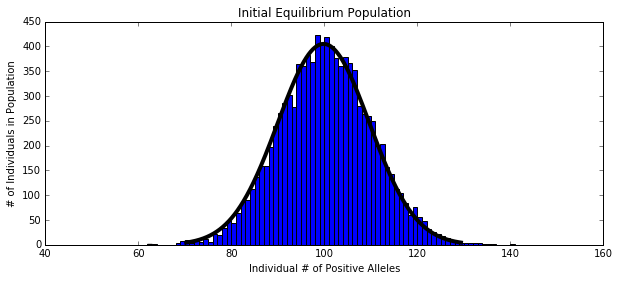

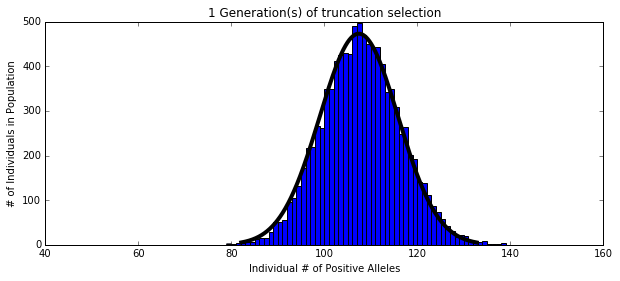

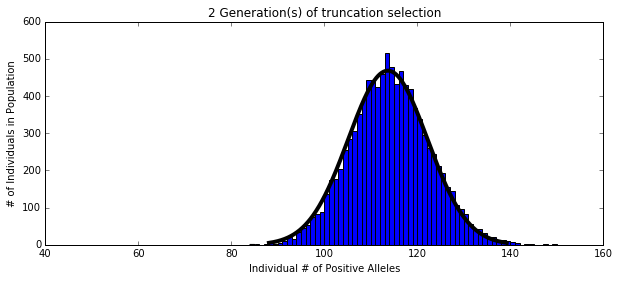

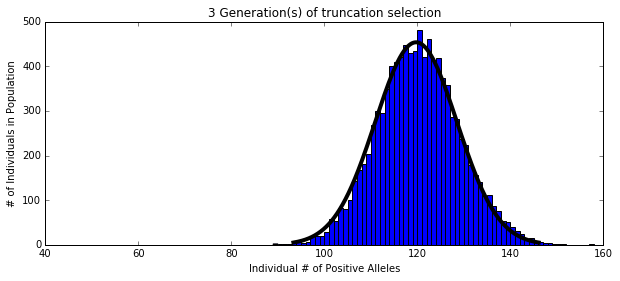

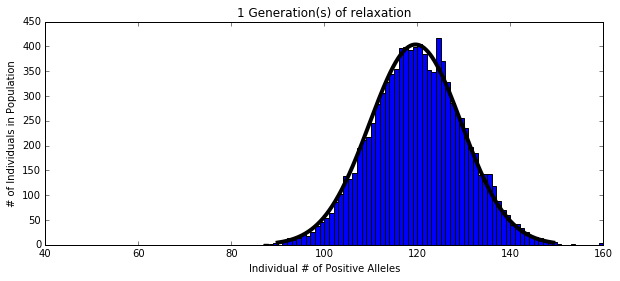

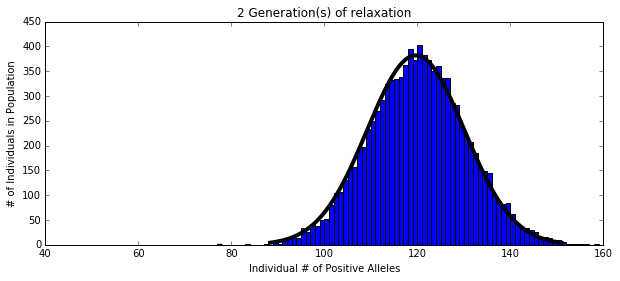

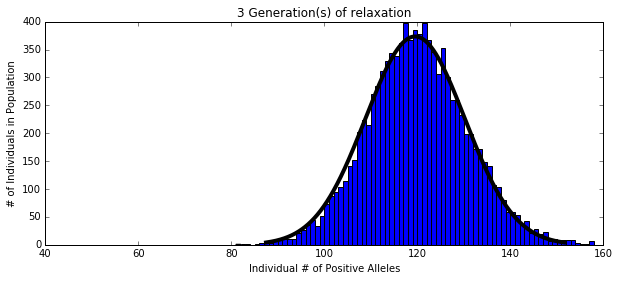

In [8]:
# Let's see what happens after repeated truncation selection (4 generations) and then 4 generations of relaxation
population = [generate_individual(N, p) for i in range(10000)]
show_population(population, title='Initial Equilibrium Population')

for i in range(1, 4):
    truncated = truncate_population(population, 0.5)
    population = random_mating(truncated, 10000)
    show_population(population, title='{} Generation(s) of truncation selection'.format(i))

for i in range(1, 4):
    population = random_mating(population, 10000)
    show_population(population, title='{} Generation(s) of relaxation'.format(i))